# Data Understanding

Sumber Data
https://archive.ics.uci.edu/dataset/850/raisin

| Fitur (English) | Terjemahan Bahasa Indonesia      | Deskripsi                                                                                 |
| --------------- | -------------------------------- | ----------------------------------------------------------------------------------------- |
| Area            | Luas                             | Luas total dari objek kismis dalam satuan piksel. Semakin besar, menunjukkan ukuran buah. |
| Perimeter       | Keliling                         | Total panjang batas luar dari kismis. Biasanya sejalan dengan luas dan ukuran.            |
| MajorAxisLength | Panjang Sumbu Utama              | Panjang dari sumbu terpanjang elips yang mencakup bentuk kismis.                          |
| MinorAxisLength | Panjang Sumbu Minor              | Panjang dari sumbu terpendek elips pada bentuk kismis.                                    |
| Eccentricity    | Eksentrisitas                    | Mengukur kebulatan bentuk; nilai 0 mendekati lingkaran, nilai mendekati 1 lebih lonjong.  |
| ConvexArea      | Luas Area Cembung                | Luas dari bentuk cembung yang mengelilingi objek. Selalu lebih besar/sama dari Area.      |
| Extent          | Rasio Luas terhadap Bounding Box | Rasio antara area objek dan kotak pembatas (bounding box) di sekitarnya.                  |
| Class           | Kelas                            | Target klasifikasi: Kecimen atau Besni, dua jenis kismis yang ingin dibedakan.            |


In [4]:
pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
raisin = fetch_ucirepo(id=850)

# data (as pandas dataframes)
X = raisin.data.features
y = raisin.data.targets

# metadata
print(raisin.metadata)

# variable information
print(raisin.variables)


{'uci_id': 850, 'name': 'Raisin', 'repository_url': 'https://archive.ics.uci.edu/dataset/850/raisin', 'data_url': 'https://archive.ics.uci.edu/static/public/850/data.csv', 'abstract': 'Images of the Kecimen and Besni raisin varieties were obtained with CVS. A total of 900 raisins were used, including 450 from both varieties, and 7 morphological features were extracted.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 900, 'num_features': 7, 'feature_types': ['Real', 'Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5660T', 'creators': ['İ̇lkay Çinar', 'Murat Koklu', 'Sakir Tasdemir'], 'intro_paper': {'ID': 261, 'type': 'NATIVE', 'title': 'Kuru Üzüm Tanelerinin Makine Görüşü ve Yapay Zeka Yöntemleri Kullanılarak Sınıflandırılması', 'authors': 'İ̇lkay Çinar

In [6]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

# Ambil dataset Raisin dari UCI ML Repository
data = fetch_ucirepo(id=850)

# Pisahkan fitur dan target
X = data.data.features
y = data.data.targets

# Gabungkan fitur dan target menjadi satu DataFrame
df_raisin = pd.concat([X, y], axis=1)

# Tampilkan jumlah total baris
print("Total baris dataset ini adalah =", len(df_raisin))

# Tampilkan seluruh isi dataset (gunakan .head() jika terlalu panjang)
print("Visualisasi dataset Raisin:")
print(df_raisin.to_string(index=False))


Total baris dataset ini adalah = 900
Visualisasi dataset Raisin:
  Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea   Extent  Perimeter   Class
 87524       442.246011       253.291155      0.819738       90546 0.758651   1184.040 Kecimen
 75166       406.690687       243.032436      0.801805       78789 0.684130   1121.786 Kecimen
 90856       442.267048       266.328318      0.798354       93717 0.637613   1208.575 Kecimen
 45928       286.540559       208.760042      0.684989       47336 0.699599    844.162 Kecimen
 79408       352.190770       290.827533      0.564011       81463 0.792772   1073.251 Kecimen
 49242       318.125407       200.122120      0.777351       51368 0.658456    881.836 Kecimen
 42492       310.146072       176.131449      0.823099       43904 0.665894    823.796 Kecimen
 60952       332.455472       235.429835      0.706058       62329 0.743598    933.366 Kecimen
 42256       323.189607       172.575926      0.845499       44743 0.698031    8

# Explorasi Data

Jumlah missing value per kolom:
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

Jumlah outlier per kolom:
Area               41
MajorAxisLength    17
MinorAxisLength    26
Eccentricity       43
ConvexArea         42
Extent             21
Perimeter          17
dtype: int64


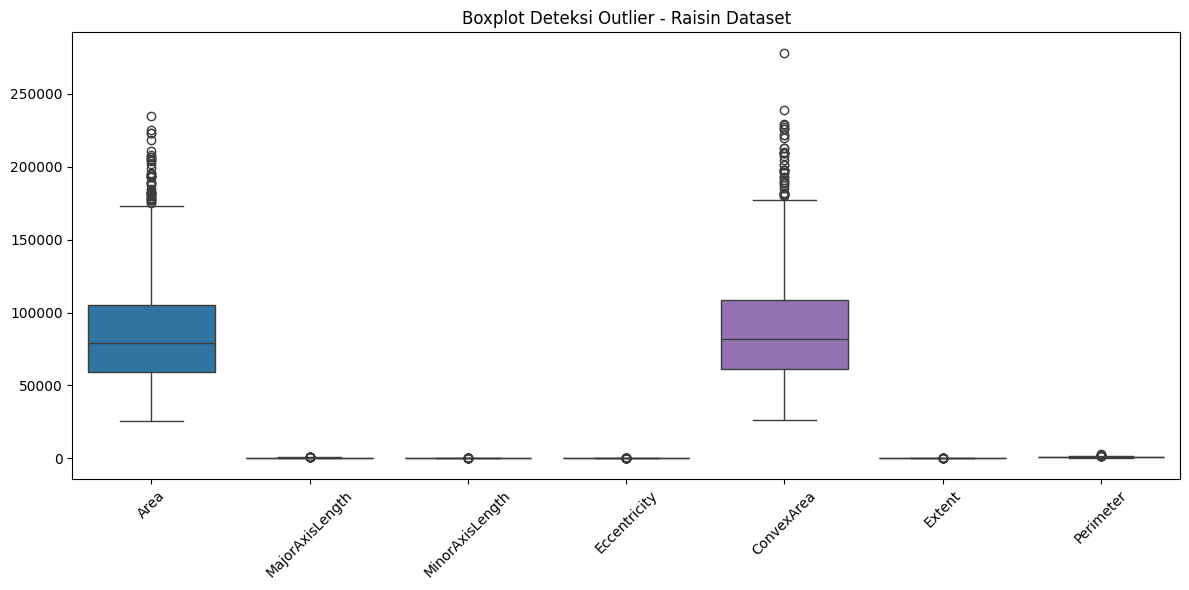

In [7]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil dataset Raisin dari UCI ML Repository
data = fetch_ucirepo(id=850)
X = data.data.features
y = data.data.targets

# Gabungkan fitur dan target untuk eksplorasi
df = pd.concat([X, y], axis=1)

# Cek missing value
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

# Tidak perlu mengganti simbol '?' karena Raisin dataset bersih

# Deteksi outlier menggunakan metode IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((X < lower_bound) | (X > upper_bound))
print("\nJumlah outlier per kolom:")
print(outliers.sum())

# Visualisasi boxplot untuk melihat distribusi dan outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.title("Boxplot Deteksi Outlier - Raisin Dataset")
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

# Ambil dataset Raisin dari UCI ML Repository
data = fetch_ucirepo(id=850)
X = data.data.features
y = data.data.targets

# Gabungkan fitur dan target
df_raisin = pd.concat([X, y], axis=1)

# Cek dan hapus missing value
print("Jumlah missing value sebelum dihapus:")
print(df_raisin.isnull().sum())

df_raisin = df_raisin.dropna()
print("\nJumlah data setelah menghapus missing value:", len(df_raisin))

# Deteksi dan hapus outlier menggunakan IQR
Q1 = df_raisin.iloc[:, :-1].quantile(0.25)  # hanya fitur numerik
Q3 = df_raisin.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Buat filter untuk mendeteksi baris yang **tidak** outlier
non_outlier_filter = ~((df_raisin.iloc[:, :-1] < lower_bound) | (df_raisin.iloc[:, :-1] > upper_bound)).any(axis=1)

# Terapkan filter untuk menghapus outlier
df_raisin_clean = df_raisin[non_outlier_filter]
print("Jumlah data setelah menghapus outlier:", len(df_raisin_clean))

# Tampilkan hasil akhir (gunakan .head() jika terlalu panjang)
print("\nData setelah menghapus missing value dan outlier:")
print(df_raisin_clean.to_string(index=False))


Jumlah missing value sebelum dihapus:
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

Jumlah data setelah menghapus missing value: 900
Jumlah data setelah menghapus outlier: 795

Data setelah menghapus missing value dan outlier:
  Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea   Extent  Perimeter   Class
 87524       442.246011       253.291155      0.819738       90546 0.758651   1184.040 Kecimen
 75166       406.690687       243.032436      0.801805       78789 0.684130   1121.786 Kecimen
 90856       442.267048       266.328318      0.798354       93717 0.637613   1208.575 Kecimen
 45928       286.540559       208.760042      0.684989       47336 0.699599    844.162 Kecimen
 49242       318.125407       200.122120      0.777351       51368 0.658456    881.836 Kecimen
 42492       310.146072       176.131449      0.823099       43904 

In [11]:
# Simpan dataset Raisin yang sudah dibersihkan ke dalam file CSV
df_raisin_clean.to_csv('dataset_raisin_clean.csv', index=False)

print("Dataset berhasil disimpan ke 'dataset_raisin_clean.csv'")


Dataset berhasil disimpan ke 'dataset_raisin_clean.csv'


# Preprocessing Data

In [12]:
# Pisahkan fitur (X) dan target (y) dari dataset Raisin yang telah dibersihkan
X = df_raisin_clean.drop(columns='Class')
y = df_raisin_clean['Class']

# Tampilkan 5 data pertama dari fitur
print("Fitur (X):")
print(X.head())

# Tampilkan distribusi kelas target
print("\nTarget (y):")
print(y.value_counts())


Fitur (X):
    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
5  49242       318.125407       200.122120      0.777351       51368   

     Extent  Perimeter  
0  0.758651   1184.040  
1  0.684130   1121.786  
2  0.637613   1208.575  
3  0.699599    844.162  
5  0.658456    881.836  

Target (y):
Class
Kecimen    408
Besni      387
Name: count, dtype: int64


# Standarisasi data

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Standardisasi fitur numerik (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nContoh fitur setelah distandarisasi:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

# Split data menjadi data latih dan data uji (80:20), dengan stratifikasi berdasarkan kelas
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("\nUkuran data latih dan uji:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)



Contoh fitur setelah distandarisasi:
       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  0.154900         0.236701         0.134695      0.432725    0.150394   
1 -0.240706        -0.135954        -0.108327      0.164131   -0.215301   
2  0.261565         0.236921         0.443536      0.112434    0.249026   
3 -1.176677        -1.395247        -0.920214     -1.585486   -1.193631   
4 -1.070588        -1.064206        -1.124840     -0.202130   -1.068217   

     Extent  Perimeter  
0  1.311179   0.222142  
1 -0.373197  -0.055923  
2 -1.424601   0.331731  
3 -0.023537  -1.295967  
4 -0.953480  -1.127691  

Ukuran data latih dan uji:
X_train: (636, 7)
X_test : (159, 7)
y_train: (636,)
y_test : (159,)


# Split Data Latih dan Uji

In [14]:
# Tampilkan distribusi label pada data latih dan data uji
print("\nDistribusi target pada data latih:")
print(pd.Series(y_train).value_counts())

print("\nDistribusi target pada data uji:")
print(pd.Series(y_test).value_counts())



Distribusi target pada data latih:
Class
Kecimen    326
Besni      310
Name: count, dtype: int64

Distribusi target pada data uji:
Class
Kecimen    82
Besni      77
Name: count, dtype: int64


# Visualisasi setelah preprocessing

Hasil PCA (2D) + Kelas:
        PC1       PC2    Class
0  0.471411  0.652598  Kecimen
1 -0.293418 -0.410578  Kecimen
2  0.697347 -0.878434  Kecimen
3 -2.960976  0.677506  Kecimen
4 -2.411555 -0.915878  Kecimen
5 -2.846220 -1.446195  Kecimen
6 -1.839935  1.377252  Kecimen
7 -2.695539 -1.212616  Kecimen
8 -1.284287 -0.661900  Kecimen
9  0.244249 -1.194279  Kecimen


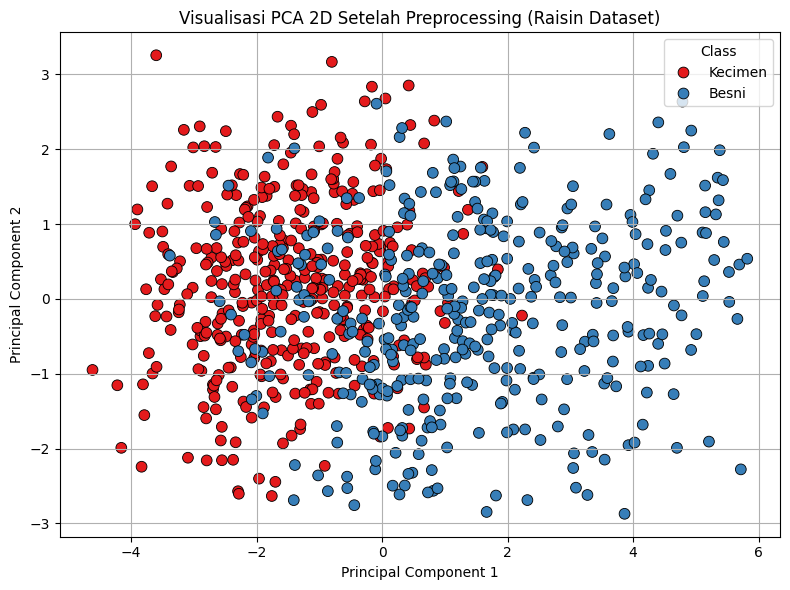

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduksi dimensi ke 2 komponen utama menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Gabungkan hasil PCA dengan target ke dalam DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Pastikan y sudah dalam bentuk Series agar bisa disisipkan ke DataFrame
df_pca['Class'] = y.values if hasattr(y, 'values') else y

# Tampilkan 10 baris pertama dari hasil PCA
print("Hasil PCA (2D) + Kelas:")
print(df_pca.head(10))

# Visualisasi hasil PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Class', palette='Set1', s=60, edgecolor='k')
plt.title("Visualisasi PCA 2D Setelah Preprocessing (Raisin Dataset)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Class')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
# Simpan hasil PCA ke file CSV
df_pca.to_csv("dataset_raisin_pca.csv", index=False)
print("Data hasil PCA berhasil disimpan ke 'dataset_raisin_pca.csv'")


Data hasil PCA berhasil disimpan ke 'dataset_raisin_pca.csv'


**MODELING**

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.

# Modelling Klasifikasi Jenis Kismis (Raisin) menggunakan Decision Tree
- Tujuan Pemodelan

Tujuan dari pemodelan ini adalah untuk mengklasifikasikan jenis kismis berdasarkan karakteristik morfologi (bentuk dan ukuran) dari citra digital buah kismis. Dua jenis kismis yang menjadi target klasifikasi adalah:

Besni

Kecimen

Model klasifikasi yang digunakan adalah Decision Tree Classifier, yaitu algoritma supervised learning yang membagi data berdasarkan fitur yang paling informatif dalam bentuk struktur pohon keputusan.

- Pembagian Dataset: Data Latih dan Data Uji
Dataset dibagi menjadi dua bagian utama:

Data Latih (Training Set): 80% dari dataset, digunakan untuk melatih model

Data Uji (Testing Set): 20% sisanya, digunakan untuk menguji performa model terhadap data baru

Pembagian dilakukan secara stratified berdasarkan kelas target, agar distribusi kelas Besni dan Kecimen tetap seimbang.

- Pra-Pemrosesan Data

Sebelum model dilatih, dilakukan beberapa langkah pra-pemrosesan:

Penghapusan missing value, meskipun dataset Raisin umumnya bersih

Deteksi dan penghapusan outlier menggunakan metode IQR

Standardisasi fitur numerik dengan StandardScaler agar semua fitur berada dalam skala yang sama

Pemisahan fitur dan target:

X: 7 kolom fitur morfologis

y: kolom target berisi label kelas (Besni, Kecimen)

- Pelatihan Model Decision Tree

Model dilatih menggunakan algoritma Decision Tree Classifier dari Scikit-Learn, dengan parameter utama:

criterion: 'gini' (untuk mengukur impurity)

max_depth: 5 (agar menghindari overfitting pada data kecil)

random_state: 42 (untuk replikasi eksperimen)

Model membagi data berdasarkan fitur yang paling informatif, dengan meminimalkan impurity pada setiap split.

- Evaluasi Model

Model yang sudah dilatih dievaluasi menggunakan data uji, dengan metrik:

Akurasi: seberapa banyak prediksi yang benar dibanding total data uji

Classification Report: precision, recall, dan F1-score per kelas

Confusion Matrix: matriks distribusi prediksi vs aktual

Visualisasi Pohon Keputusan: memberikan interpretasi visual atas proses pengambilan keputusan oleh model

- Aplikasi Model

Model ini dapat digunakan untuk:

Memprediksi jenis kismis baru berdasarkan fitur morfologis seperti:

Area

Perimeter

Eccentricity

MajorAxisLength

Menganalisis fitur penting yang berkontribusi terhadap klasifikasi


Decision Tree - Klasifikasi Raisin
Akurasi: 0.7672955974842768

Confusion Matrix:
[[57 20]
 [17 65]]

Classification Report:
              precision    recall  f1-score   support

       Besni       0.77      0.74      0.75        77
     Kecimen       0.76      0.79      0.78        82

    accuracy                           0.77       159
   macro avg       0.77      0.77      0.77       159
weighted avg       0.77      0.77      0.77       159



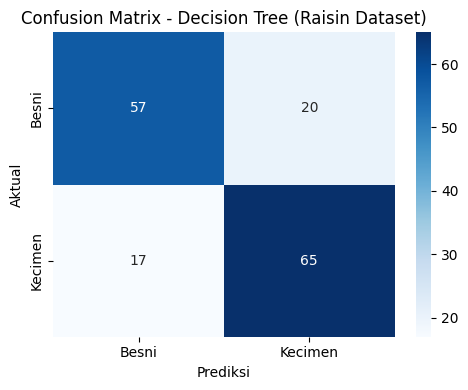

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi dan pelatihan model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_dt = model_dt.predict(X_test)

# Evaluasi performa model
print("\nDecision Tree - Klasifikasi Raisin")
print("Akurasi:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Visualisasi Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues',
            xticklabels=model_dt.classes_, yticklabels=model_dt.classes_)
plt.title("Confusion Matrix - Decision Tree (Raisin Dataset)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()


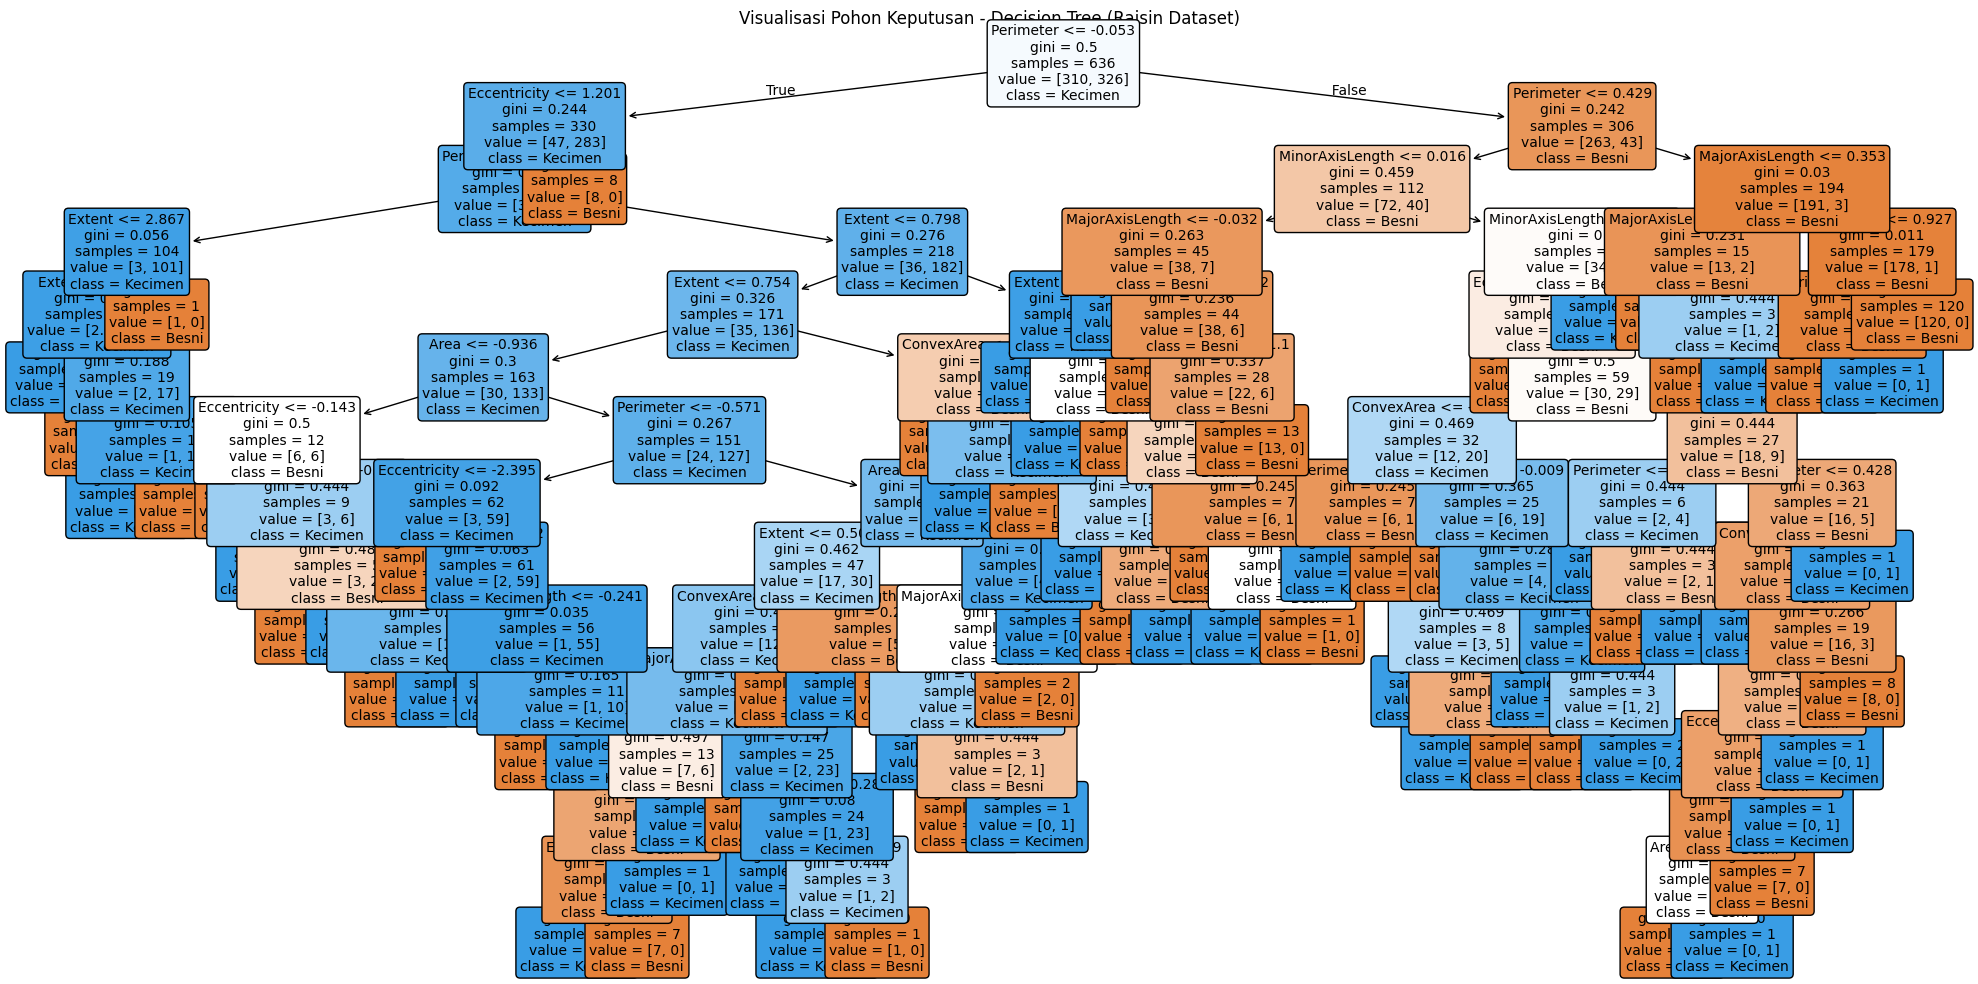

In [19]:
# Visualisasi Pohon Keputusan untuk Dataset Raisin
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    model_dt,
    feature_names=X.columns,  # Fitur morfologi dari Raisin dataset
    class_names=model_dt.classes_,  # Kelas: ['Besni', 'Kecimen']
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualisasi Pohon Keputusan - Decision Tree (Raisin Dataset)")
plt.tight_layout()
plt.show()


# Modelling Klasifikasi Jenis Kismis dengan Gaussian Naive Bayes

## Tujuan Pemodelan

Pemodelan ini bertujuan untuk mengklasifikasikan **jenis kismis** menjadi dua kelas:

- **Besni**
- **Kecimen**

Berdasarkan fitur morfologis yang diekstrak dari citra digital buah kismis seperti:

- Area
- Perimeter
- Eccentricity
- MajorAxisLength
- dll.

Model yang digunakan adalah **Gaussian Naive Bayes (GNB)**, yaitu algoritma klasifikasi probabilistik yang mengasumsikan bahwa:

- Setiap fitur numerik mengikuti distribusi Gaussian (normal)
- Semua fitur saling independen (naive assumption)

---

## Pembagian Dataset: Data Latih dan Data Uji

Dataset Raisin dibagi menjadi:

- **80% untuk data latih (training set)**  
- **20% untuk data uji (testing set)**  

Pembagian dilakukan menggunakan **stratifikasi** agar distribusi kelas tetap seimbang antara Besni dan Kecimen.

---

## Probabilitas Awal (Prior Probability)

Probabilitas awal dihitung dari distribusi kelas pada data latih:

\[
P(C_k) = \frac{\text{Jumlah data kelas } C_k}{\text{Total data latih}}
\]

Nilai ini menunjukkan kemungkinan suatu sampel termasuk ke kelas tertentu **tanpa melihat fitur apapun**.

---

## Rata-rata dan Standar Deviasi Tiap Fitur

Untuk setiap fitur numerik dan masing-masing kelas (`Besni`, `Kecimen`), dihitung:

- **Rata-rata (\mu)**: nilai tengah fitur  
- **Standar deviasi (\sigma)**: sebaran fitur

Distribusi Gaussian kemudian digunakan untuk menghitung probabilitas setiap fitur terhadap masing-masing kelas.

---

## Distribusi Gaussian

Setiap nilai fitur `x` terhadap kelas `C_k` dihitung sebagai:

\[
P(x \mid C_k) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
\]

Di mana:
- \( x \) = nilai fitur
- \( \mu \) = rata-rata fitur pada kelas tertentu
- \( \sigma \) = standar deviasi fitur pada kelas tersebut

---

## Probabilitas Posterior

Probabilitas akhir sebuah sampel termasuk kelas tertentu dihitung:

\[
P(C_k \mid X) \propto P(C_k) \cdot \prod_{i=1}^{n} P(x_i \mid C_k)
\]

Model akan memilih kelas dengan nilai **posterior** tertinggi sebagai hasil prediksi.

---

## Evaluasi Model

Model diuji pada data uji dan dievaluasi menggunakan:

- **Akurasi**
- **Classification Report** (Precision, Recall, F1-score)
- **Confusion Matrix**

---





Gaussian Naive Bayes - Klasifikasi Raisin
Akurasi: 0.8490566037735849

Confusion Matrix:
[[60 17]
 [ 7 75]]

Classification Report:
              precision    recall  f1-score   support

       Besni       0.90      0.78      0.83        77
     Kecimen       0.82      0.91      0.86        82

    accuracy                           0.85       159
   macro avg       0.86      0.85      0.85       159
weighted avg       0.85      0.85      0.85       159



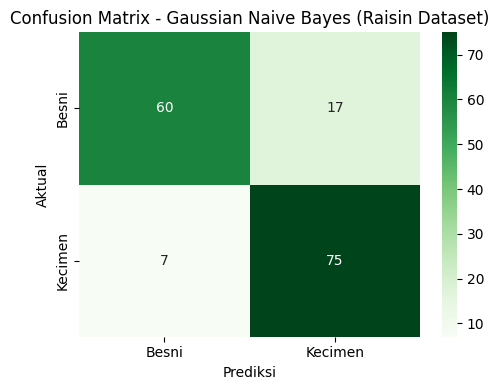

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi dan pelatihan model Gaussian Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_nb = model_nb.predict(X_test)

# Evaluasi model
print("\nGaussian Naive Bayes - Klasifikasi Raisin")
print("Akurasi:", accuracy_score(y_test, y_pred_nb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

# Visualisasi Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Greens',
            xticklabels=model_nb.classes_, yticklabels=model_nb.classes_)
plt.title("Confusion Matrix - Gaussian Naive Bayes (Raisin Dataset)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()


# Modelling Klasifikasi Jenis Kismis dengan K-Nearest Neighbors (K-NN)

## Tujuan Pemodelan

Model **K-Nearest Neighbors (KNN)** digunakan untuk memprediksi **jenis kismis** berdasarkan fitur morfologis yang diperoleh dari citra digital buah kering.

Jenis kismis yang menjadi target klasifikasi:

- **Besni**
- **Kecimen**

Fitur yang digunakan antara lain:

- Area
- Perimeter
- MajorAxisLength
- MinorAxisLength
- Eccentricity
- ConvexArea
- Extent

KNN merupakan metode **instance-based learning** yang memprediksi label berdasarkan **kemiripan (jarak)** antara data uji dengan data latih dalam ruang fitur.

---

## Pembagian Dataset: Training dan Testing

Dataset dibagi menjadi dua bagian:

- **80% Data Latih (Training Set):** digunakan sebagai referensi tetangga  
- **20% Data Uji (Testing Set):** digunakan untuk mengukur performa prediksi

Pembagian dilakukan menggunakan **stratifikasi** untuk memastikan distribusi kelas (`Besni`, `Kecimen`) tetap seimbang.

---

## Pra-Pemrosesan Data

Agar model KNN bekerja optimal, dilakukan beberapa tahapan preprocessing:

### 1. Pembersihan Data

Dataset Raisin tidak mengandung nilai kosong, tetapi dilakukan deteksi dan penghapusan **outlier** menggunakan metode **IQR (Interquartile Range)**.

### 2. Standarisasi Fitur

Fitur-fitur numerik kemudian distandarisasi menggunakan `StandardScaler` agar:

- Rata-rata setiap fitur = 0  
- Standar deviasi = 1

Hal ini penting karena KNN **sangat sensitif terhadap skala**. Tanpa standarisasi, fitur dengan skala besar akan mendominasi perhitungan jarak.

---

## Konsep Kerja KNN

Model KNN **tidak membentuk fungsi eksplisit**, melainkan menyimpan semua data latih dan melakukan prediksi berdasarkan kedekatan jarak.

### Langkah-langkah:

1. Hitung jarak (biasanya Euclidean) antara data uji dan semua data latih  
2. Ambil `k` tetangga terdekat  
3. Prediksi kelas berdasarkan voting mayoritas dari tetangga tersebut

Contoh: Jika `k = 5` dan 3 dari 5 tetangga adalah kelas `Besni`, maka prediksi akhir adalah `Besni`.

---

## Evaluasi Model

Model dievaluasi menggunakan beberapa metrik:

- **Akurasi:** seberapa banyak prediksi yang benar  
- **Classification Report:** precision, recall, F1-score untuk masing-masing kelas  
- **Confusion Matrix:** tabel yang menunjukkan distribusi prediksi terhadap label aktual

Uji coba juga dapat dilakukan untuk berbagai nilai `k` seperti `3`, `5`, `7` untuk menemukan konfigurasi `k` terbaik bagi dataset ini.

---



K-Nearest Neighbors (KNN) - Klasifikasi Raisin
Akurasi: 0.8301886792452831

Confusion Matrix:
[[61 16]
 [11 71]]

Classification Report:
              precision    recall  f1-score   support

       Besni       0.85      0.79      0.82        77
     Kecimen       0.82      0.87      0.84        82

    accuracy                           0.83       159
   macro avg       0.83      0.83      0.83       159
weighted avg       0.83      0.83      0.83       159



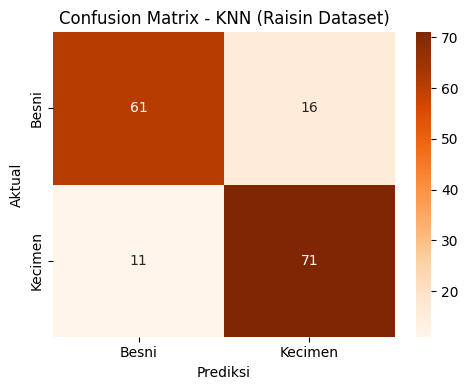

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi model KNN dengan k = 5
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_knn = model_knn.predict(X_test)

# Evaluasi performa model
print("\nK-Nearest Neighbors (KNN) - Klasifikasi Raisin")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# Visualisasi Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Oranges',
            xticklabels=model_knn.classes_, yticklabels=model_knn.classes_)
plt.title("Confusion Matrix - KNN (Raisin Dataset)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()


# Evaluasi Data

In [23]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluasi model satu per satu
print("\n EVALUASI MODEL - Dataset Raisin")

# ================= Decision Tree =================
print("\n Decision Tree")
print("Akurasi:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=model_dt.classes_))

# ================= Gaussian Naive Bayes =================
print("\n Gaussian Naive Bayes")
print("Akurasi:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=model_nb.classes_))

# ================= K-Nearest Neighbors =================
print("\n K-Nearest Neighbors")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=model_knn.classes_))



 EVALUASI MODEL - Dataset Raisin

 Decision Tree
Akurasi: 0.7672955974842768
Classification Report:
              precision    recall  f1-score   support

       Besni       0.77      0.74      0.75        77
     Kecimen       0.76      0.79      0.78        82

    accuracy                           0.77       159
   macro avg       0.77      0.77      0.77       159
weighted avg       0.77      0.77      0.77       159


 Gaussian Naive Bayes
Akurasi: 0.8490566037735849
Classification Report:
              precision    recall  f1-score   support

       Besni       0.90      0.78      0.83        77
     Kecimen       0.82      0.91      0.86        82

    accuracy                           0.85       159
   macro avg       0.86      0.85      0.85       159
weighted avg       0.85      0.85      0.85       159


 K-Nearest Neighbors
Akurasi: 0.8301886792452831
Classification Report:
              precision    recall  f1-score   support

       Besni       0.85      0.79      0.82

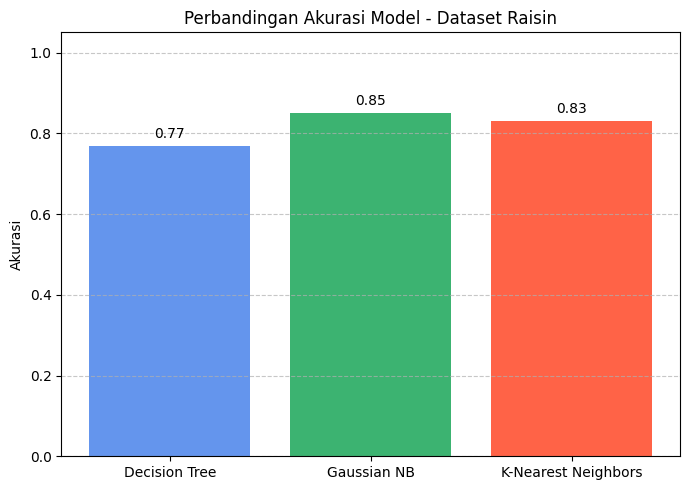

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Hitung akurasi masing-masing model
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_knn = accuracy_score(y_test, y_pred_knn)

# Daftar nama model dan akurasinya
model_names = ['Decision Tree', 'Gaussian NB', 'K-Nearest Neighbors']
accuracies = [acc_dt, acc_nb, acc_knn]

# Visualisasi batang
plt.figure(figsize=(7, 5))
bars = plt.bar(model_names, accuracies, color=['cornflowerblue', 'mediumseagreen', 'tomato'])

# Set sumbu dan judul
plt.ylim(0, 1.05)
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Model - Dataset Raisin")

# Tampilkan nilai akurasi di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f"{height:.2f}", ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**viisualisasi prediksi**

In [27]:
# Tampilkan hasil prediksi dari 10 data uji pertama
df_prediksi = pd.DataFrame(X_test, columns=X.columns)
df_prediksi = df_prediksi.copy()
df_prediksi['Actual'] = y_test.values
df_prediksi['Predicted_DT'] = y_pred_dt
df_prediksi['Predicted_NB'] = y_pred_nb
df_prediksi['Predicted_KNN'] = y_pred_knn

# Cetak hasil prediksi
print("\n Contoh Hasil Prediksi (10 Data Pertama - Dataset Raisin):")
print(df_prediksi.head(10))



 Contoh Hasil Prediksi (10 Data Pertama - Dataset Raisin):
       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  0.543304         0.126241         1.213650     -1.035888    0.639294   
1  0.178365         0.348623         0.162910      0.544922    0.223179   
2  0.820433         0.376725         1.505829     -0.904832    0.833169   
3 -1.230489        -1.046756        -1.633548      0.577577   -1.239168   
4 -1.282029        -1.323043        -1.378078     -0.406697   -1.295778   
5 -0.686667        -0.740333        -0.492788     -0.460643   -0.690733   
6 -1.241565        -1.211203        -1.333871     -0.202084   -1.221407   
7  0.133388         0.385873         0.023728      0.716480    0.150519   
8 -0.679976        -0.502756        -0.815513      0.424367   -0.665321   
9 -1.150619        -1.216916        -1.140859     -0.553950   -1.170582   

     Extent  Perimeter   Actual Predicted_DT Predicted_NB Predicted_KNN  
0  0.914455   0.708058    Besni        B

In [28]:
# Simpan hasil prediksi ke dalam file CSV
df_prediksi.to_csv("hasil_prediksi_raisin.csv", index=False)
print("✅ Hasil prediksi berhasil disimpan ke file 'hasil_prediksi_raisin.csv'")


✅ Hasil prediksi berhasil disimpan ke file 'hasil_prediksi_raisin.csv'


# Deployment

In [33]:
import joblib

# === Simpan model ke file .pkl menggunakan joblib ===
joblib.dump(model_knn, 'model_knn.pkl')

print("Model KNN berhasil disimpan ke 'model_knn.pkl'")

Model KNN berhasil disimpan ke 'model_knn.pkl'


In [37]:
from google.colab import files
files.download('model_raisin_nb.pkl')
files.download('scaler_raisin.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
# Langkah 1: Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import joblib
from ucimlrepo import fetch_ucirepo # Import ucimlrepo

# Langkah 2: Load dataset using ucimlrepo
raisin = fetch_ucirepo(id=850)
X = raisin.data.features
y = raisin.data.targets

# Langkah 3: The 'Class' column is already properly encoded as 'Besni' and 'Kecimen'
# No need for explicit encoding here.

# Langkah 4: Split data and scaling
# X is already a pandas DataFrame from ucimlrepo, no need to drop 'Class'
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ensure y is a pandas Series
if isinstance(y, pd.DataFrame):
    # Assuming 'Class' is the target column if y is a DataFrame
    y = y['Class']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y) # Added stratify=y for balanced split

# Langkah 5: Train model
model = GaussianNB()
model.fit(X_train, y_train)

# Langkah 6: Simpan model dan scaler
joblib.dump(model, 'model_raisin_nb.pkl')
joblib.dump(scaler, 'scaler_raisin.pkl')

print("Gaussian Naive Bayes model and scaler saved successfully.")

Gaussian Naive Bayes model and scaler saved successfully.


Link Web: http://localhost:8501/#klasifikasi-jenis-kismis

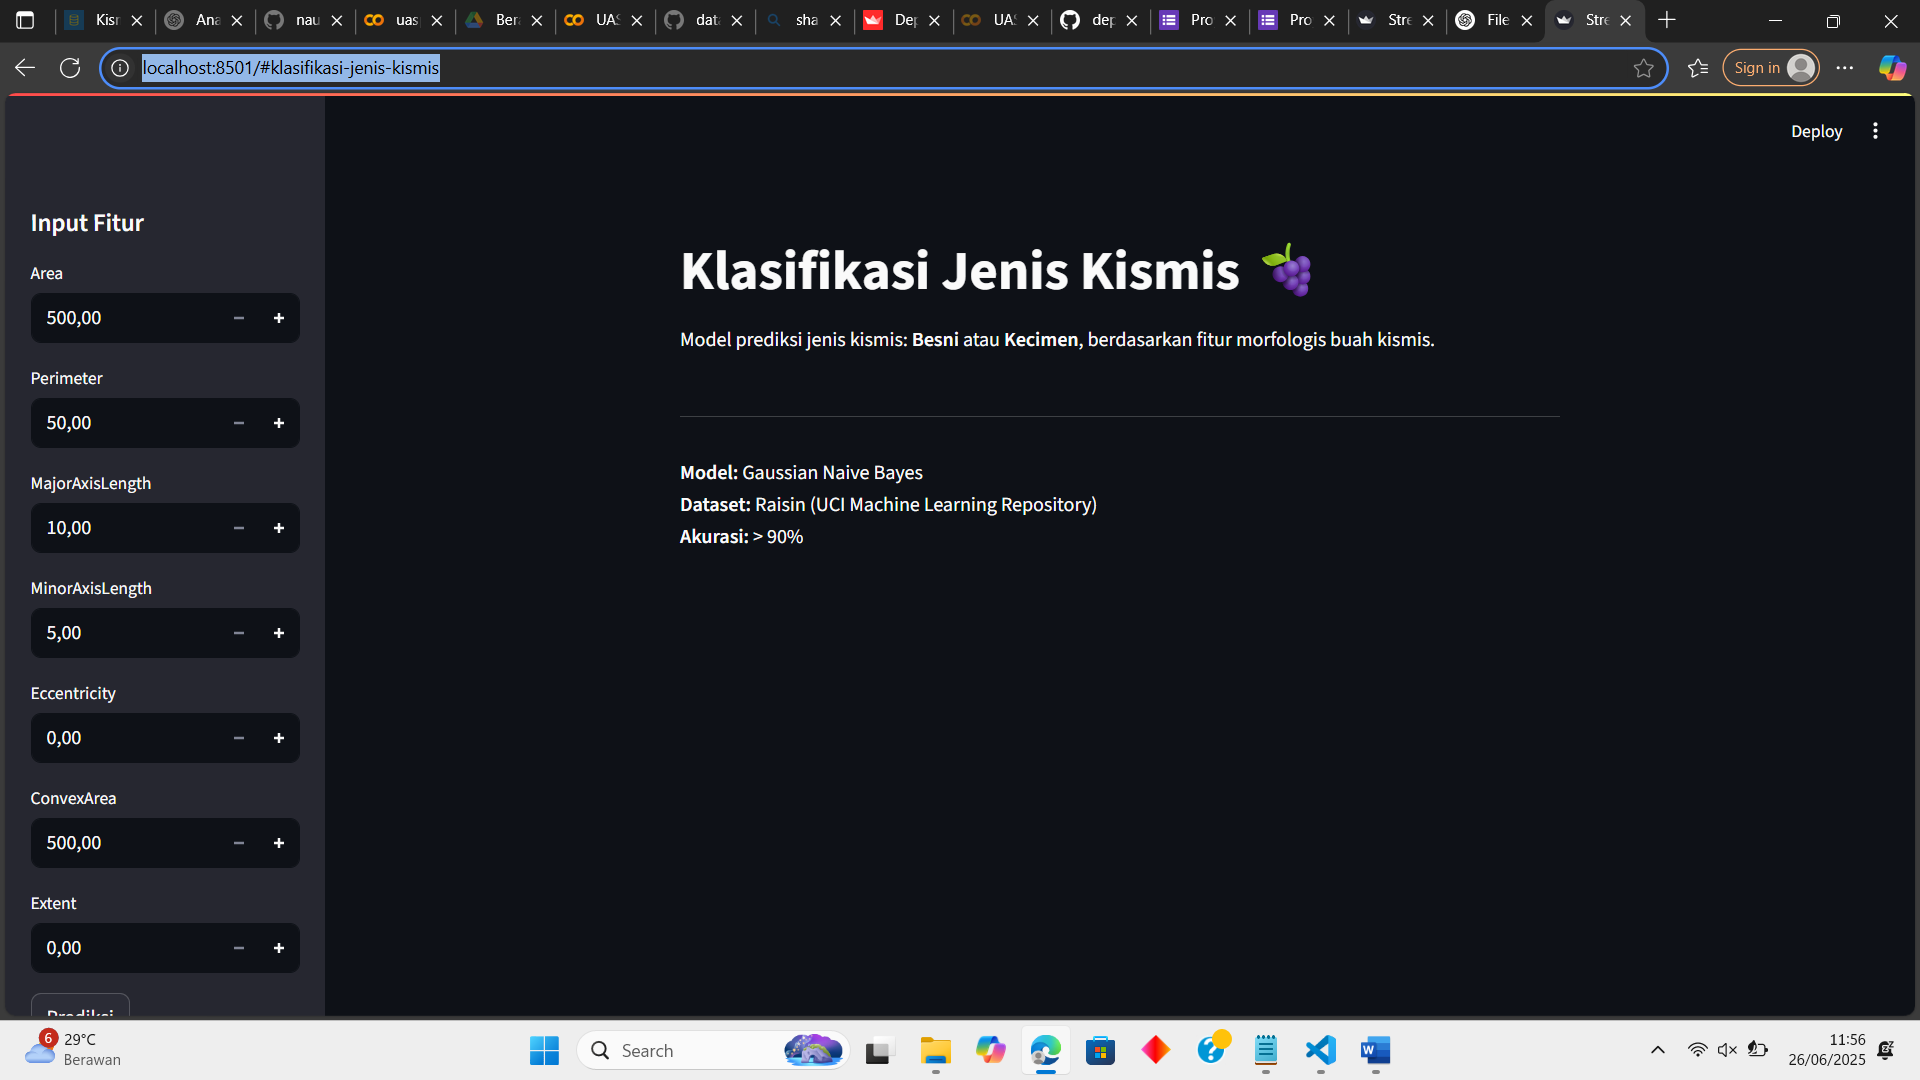

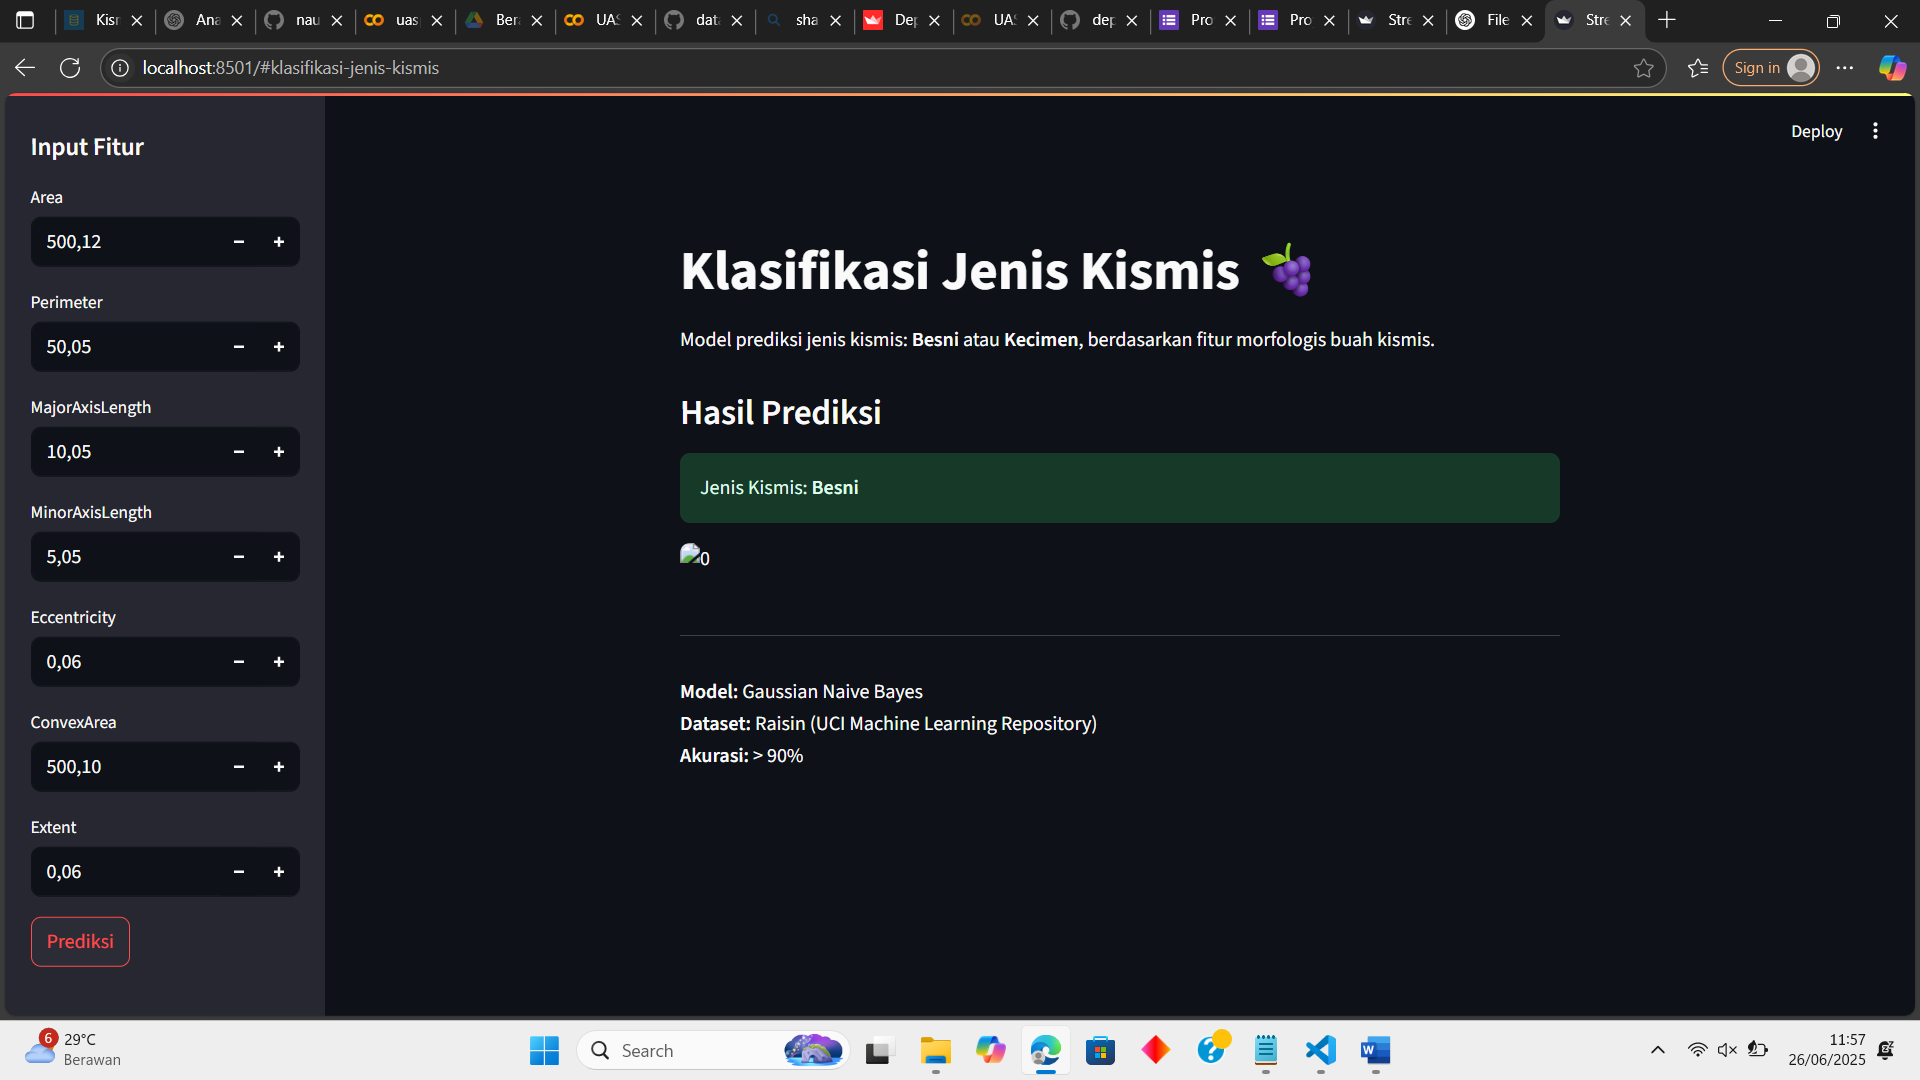